# PyTorch Basic
- numpy 메소드와 비슷한게 많다. -> 그래서 쉬움

In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt

In [2]:
nums = np.arange(9)
nums

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [3]:
nums = torch.arange(9)
nums

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [4]:
print(nums.shape)
print(nums.reshape([3,3]))

torch.Size([9])
tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])


In [5]:
torch.arange(1, 0, -0.1)

tensor([1.0000, 0.9000, 0.8000, 0.7000, 0.6000, 0.5000, 0.4000, 0.3000, 0.2000,
        0.1000])

In [6]:
torch.arange(1., 11.).shape

torch.Size([10])

In [7]:
randoms = torch.normal(mean=torch.arange(1., 11.), std=torch.arange(1, 0, -0.1))
randoms

tensor([1.0906, 0.6822, 3.0539, 3.3654, 5.1528, 5.9954, 6.7176, 8.2817, 8.8001,
        9.9207])

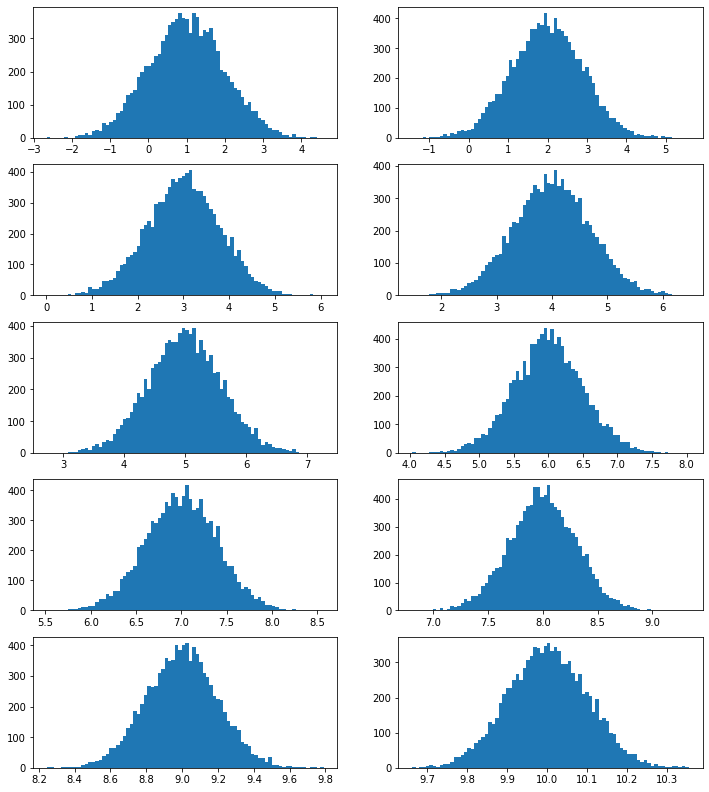

In [8]:
fig = plt.figure(figsize=[12,14])
mean = torch.arange(1., 11.)
std = torch.arange(1, 0, -0.1)
for i in range(0,10):
    fig.add_subplot(5, 2, i+1)
    distrib = np.random.normal(mean[i],std[i],10000)
    plt.hist(distrib,bins=80)
plt.show()

In [9]:
zeros = torch.zeros([3,3])
print(zeros)
ones = torch.ones([3,3])
print(ones)

zeros_like = torch.zeros_like(ones)
print(zeros_like)
print(zeros.shape)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])
torch.Size([3, 3])


## PyTorch -> numpy로 바꾸기

In [10]:
print(nums.numpy())

# item은 오직 scalar일때만 가능
n = torch.tensor(5)
print(n.item())

[0 1 2 3 4 5 6 7 8]
5


## Operation

In [11]:
nums = torch.arange(9)

In [12]:
nums*3

tensor([ 0,  3,  6,  9, 12, 15, 18, 21, 24])

In [13]:
torch.add(nums,4)

tensor([ 4,  5,  6,  7,  8,  9, 10, 11, 12])

### View 
- reshape랑 똑같음

In [14]:
range_nums = torch.arange(9).reshape(3,3)

In [15]:
range_nums

tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])

In [16]:
range_nums.view(1,9)

tensor([[0, 1, 2, 3, 4, 5, 6, 7, 8]])

## Slice and Index

In [17]:
nums = nums.view(3,3)
nums

tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])

In [18]:
nums[1]

tensor([3, 4, 5])

In [19]:
nums[1,1]

tensor(4)

In [20]:
nums[1:,1:]

tensor([[4, 5],
        [7, 8]])

In [21]:
nums[1:,]

tensor([[3, 4, 5],
        [6, 7, 8]])

## Compile

numpy를 torch tensor로 불러오기

In [22]:
arr = np.array([1,1,1])

In [23]:
arr_torch = torch.from_numpy(arr)

In [24]:
arr_torch

tensor([1, 1, 1])

타입 바꾸기

In [25]:
arr_torch.float()

tensor([1., 1., 1.])

In [26]:
arr_torch.int()

tensor([1, 1, 1], dtype=torch.int32)

In [27]:
arr_torch.double()

tensor([1., 1., 1.], dtype=torch.float64)

## cuda
- gpu을 쓸지 cpu를 쓸지 결정 함
- NVIDIA에서 계발에서 NVIDIA 그래픽 카드가 있어야 gpu 사용가능
- Mac은 사용 못함(라이젠 사용)


In [28]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [29]:
device

'cpu'

In [30]:
torch.cuda.is_available()

False

In [31]:
if torch.cuda.is_available():
    device = torch.device("cuda")          # CUDA 장치 객체(device object)로
    y = torch.ones_like(x, device=device)  # GPU 상에 직접적으로 tensor를 생성하거나
    x = x.to(device)                       # ``.to("cuda")`` 를 사용하면 됩니다.
    z = x + y
    print(z)
    print(z.to("cpu", torch.double))       # ``.to`` 는 dtype도 함께 변경합니다!

## AutoGrad
- autograd 패키지는 Tensor의 모든 연산에 대해 자동 미분을 제공.(순전파,역전파)
- backward() : 역전파 실행(단 결과 값이 스칼라이어야 가능)
- tensor 만들시 반드시 **requires_grad**를 활성화 해주어야 AutoGrad가 가능해진다.
- 참조 https://9bow.github.io/PyTorch-tutorials-kr-0.3.1/beginner/blitz/autograd_tutorial.html 

![](https://9bow.github.io/PyTorch-tutorials-kr-0.3.1/_images/Variable.png)
- 활성화 된 변수는 data, grad, grad_fn 속성 값을 지님 

In [32]:
x = torch.ones(2,2,requires_grad=True)
print(x)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [33]:
print("x.data: x의 값")
print("x.grad:AutoGrad되었을때 결과값에 영향을 준 x의 기울기 값")

x.data: x의 값
x.grad:AutoGrad되었을때 결과값에 영향을 준 x의 기울기 값


In [34]:
y = x + 2
print(y)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


In [35]:
print("y.grad_fn: y가 x어떤 계산을 했는지 나타낸 기울기를 반영")
print(y.grad_fn)

y.grad_fn: y가 x어떤 계산을 했는지 나타낸 기울기를 반영


In [36]:
z = 3 * y*y
out = z.mean()

In [37]:
print(z,out)

tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>) tensor(27., grad_fn=<MeanBackward0>)


In [38]:
n = out.detach()

In [39]:
n.numpy()

array(27., dtype=float32)

In [40]:
out.backward()

In [41]:
print(x.grad)

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


## Deep Learning
![](https://heung-bae-lee.github.io/image/why_deeplearning_is_so_special.png)

# Data Preprocess


## torchvision
- 컴퓨터 비전에 관련된 메소드들을 제공

In [42]:
from torchvision import datasets, transforms

## Data Loader 부르기
- 파이토치는 DataLoader를 불러 model에 넣음

In [43]:
batch_size = 32
test_bathc_size = 32

In [44]:
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('dataset/',train=True,download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize(mean=(0.5,),std=(0.5,))
                   ])),
    batch_size=batch_size)

In [45]:
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('dataset',train=False,download=True,
                  transform=transforms.Compose([
                      transforms.ToTensor,
                      transforms.Normalize((0.5,),(0.5,))
                  ])),
    batch_size=batch_size,
    shuffle=True)

In [46]:
images,labels = next(iter(train_loader))

## iter, next 함수 
- iter(반복 가능한 객체) or (반복 가능한 객체, 반복을 끝낼값)

In [47]:
it = iter(range(3))
for i in range(3):
    print(it)
    print(next(it))
    
next(it,10)

0
1
2


10

In [48]:
it = iter(range(3))
print(next(it))
print(next(it))
print(next(it))

0
1
2


In [49]:
import random

In [50]:
random_image = images[random.randint(0,32)].reshape([28,28])
random_image = random_image.numpy()

In [51]:
print(random_image.shape)

(28, 28)


In [52]:
random_image

array([[-1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        ],
       [-1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        ],
       [-1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.    

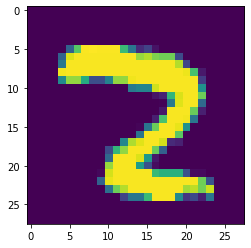

In [53]:
plt.imshow(random_image)

## 음영이 없고 오로지 형태만 있는 이미지 만들기

In [54]:
n = random_image.ravel()
for i in range(len(n)):
    if n[i]>0:
        n[i] = 1
    if n[i]<0:
        n[i]=0

In [55]:
random_image

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 0

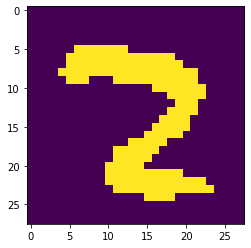

In [56]:
plt.imshow(random_image)

(array([622.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 162.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ],
       dtype=float32),
 <a list of 10 Patch objects>)

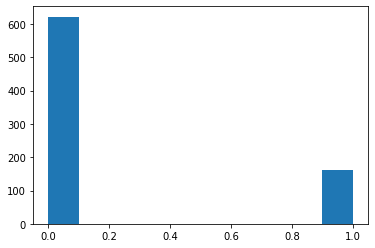

In [57]:
plt.hist(n)

(array([4., 4., 3., 4., 4., 2., 2., 1., 3., 1., 1., 3., 1., 2., 3., 2., 6.,
        4.]),
 array([-0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,
         0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9], dtype=float32),
 <a list of 18 Patch objects>)

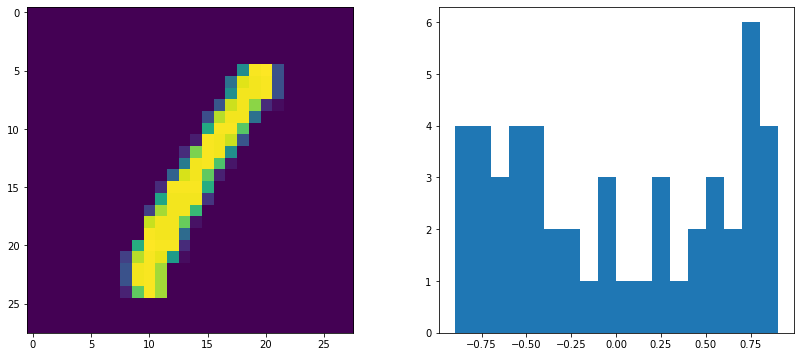

In [58]:
random_image = images[3].reshape([28,28])
random_image = random_image.numpy()

plt.figure(figsize=[14,6])
plt.subplot(1,2,1)
plt.imshow(random_image)
plt.subplot(1,2,2)
plt.hist(random_image.ravel(),18,[-0.9,0.9])

(array([1., 9., 1., 0., 5., 0., 0., 7., 2., 0., 5., 0., 3., 1., 0., 2., 2.,
        1.]),
 array([-0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,
         0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9], dtype=float32),
 <a list of 18 Patch objects>)

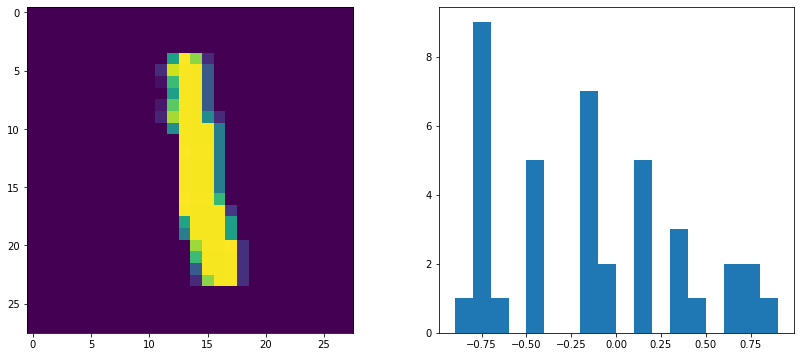

In [59]:
random_image = images[6].reshape([28,28])
random_image = random_image.numpy()

plt.figure(figsize=[14,6])
plt.subplot(1,2,1)
plt.imshow(random_image)
plt.subplot(1,2,2)
plt.hist(random_image.ravel(),18,[-0.9,0.9])

(array([7., 3., 3., 2., 0., 3., 0., 2., 0., 0., 7., 1., 5., 0., 1., 2., 0.,
        7.]),
 array([-0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,
         0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9], dtype=float32),
 <a list of 18 Patch objects>)

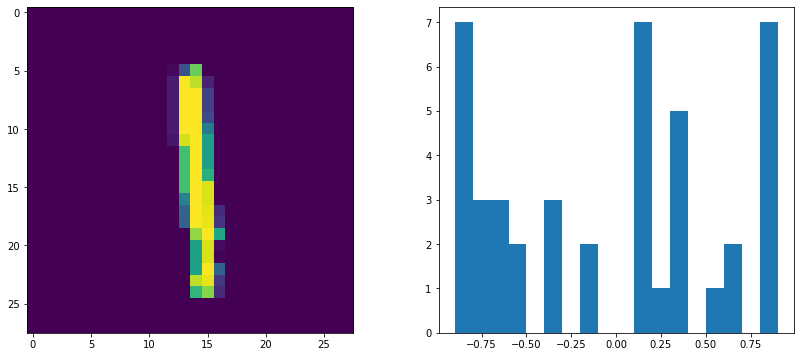

In [60]:
random_image = images[8].reshape([28,28])
random_image = random_image.numpy()

plt.figure(figsize=[14,6])
plt.subplot(1,2,1)
plt.imshow(random_image)
plt.subplot(1,2,2)
plt.hist(random_image.ravel(),18,[-0.9,0.9])

(array([ 5.,  5.,  4.,  9.,  0.,  7.,  7.,  3.,  1.,  3., 16.,  3.,  5.,
         3.,  7.,  3.,  7.,  1.]),
 array([-0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,
         0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9], dtype=float32),
 <a list of 18 Patch objects>)

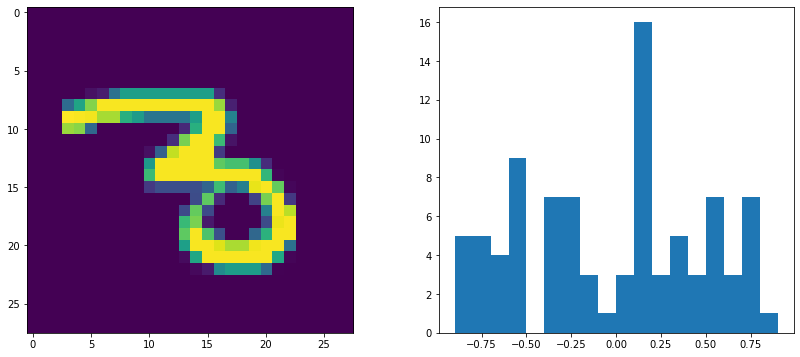

In [61]:
random_image = images[30].reshape([28,28])
random_image = random_image.numpy()

plt.figure(figsize=[14,6])
plt.subplot(1,2,1)
plt.imshow(random_image)
plt.subplot(1,2,2)
plt.hist(random_image.ravel(),18,[-0.9,0.9])

(array([4., 6., 4., 3., 3., 5., 3., 5., 6., 5., 2., 2., 5., 1., 1., 9., 4.,
        8.]),
 array([-0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,
         0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9], dtype=float32),
 <a list of 18 Patch objects>)

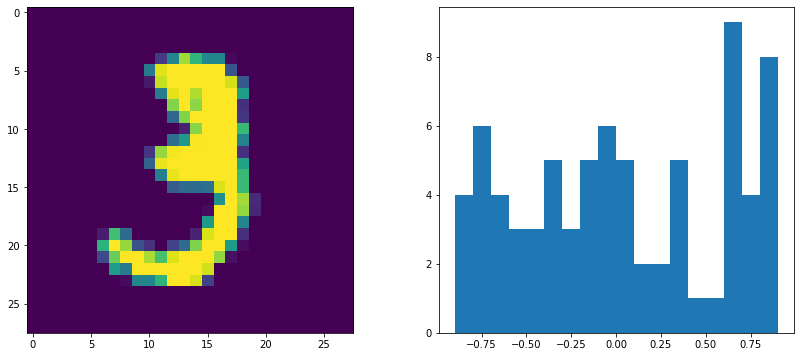

In [62]:
random_image = images[10].reshape([28,28])
random_image = random_image.numpy()

plt.figure(figsize=[14,6])
plt.subplot(1,2,1)
plt.imshow(random_image)
plt.subplot(1,2,2)
plt.hist(random_image.ravel(),18,[-0.9,0.9])

## PyTorch Layer 이해하기
- Network 쌓기 위한 준비


- nn: weight를 필요로 하는 함수를 제공함.ex) conv2d
- F: weight를 필요로 하지 않는 함수를 제공함. ex) pool
- optim: 경사하강 제공

In [63]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [64]:
train_data = torch.utils.data.DataLoader(
    datasets.MNIST('dataset/',train=True,download=False,
                   transform=transforms.Compose([transforms.ToTensor()])),
    batch_size=1)

In [65]:
image, label = next(iter(train_data))
print("batch_size, channel num, height, width")
print(image.shape)

batch_size, channel num, height, width
torch.Size([1, 1, 28, 28])


## Convolution
- in_channels: 받게 될 channel의 갯수
- out_channels: 보내고 싶은 channel의 갯수
- kernnel_size: 만들고 싶은 kernel(weight)의 사이즈

In [66]:
layer1 = nn.Conv2d(in_channels=1,out_channels=20,kernel_size=5).to(torch.device('cpu'))

- weight 시각화를 위해 slice하고 numpy화

In [67]:
weight = layer1.weight
print(weight.shape)

torch.Size([20, 1, 5, 5])


- 여기서 weight는 학습 가능한 상태이기 때문에 바로 numpy로 뽑아낼수 없음
- detach()method는 그래프에서 잠깐 빼서 gradient에 영향을 받지 않게 함

In [68]:
weight_detach = weight.detach().numpy()

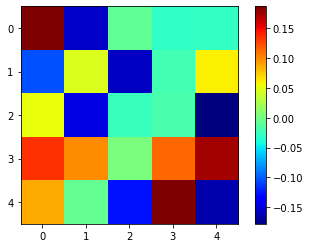

In [69]:
plt.imshow(weight_detach[0,0,:,:],'jet')
plt.colorbar()
plt.show()

- output 시각화 준비를 위해 numpy화

In [70]:
output_data1 = layer1(image)

In [71]:
output_data1 = output_data1.data

In [72]:
print(output_data1.shape)

torch.Size([1, 20, 24, 24])


In [73]:
output1 = output_data1.cpu().numpy()

## filter 적용한 이미지

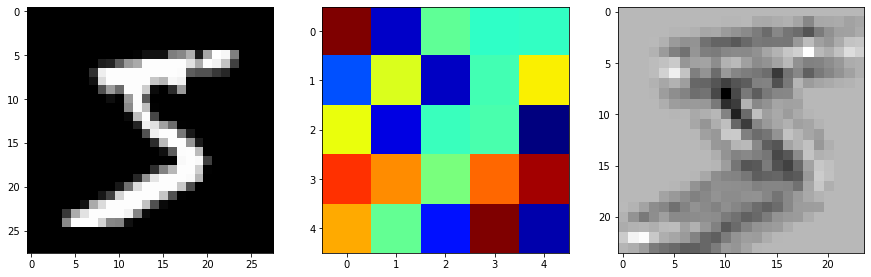

In [74]:
plt.figure(figsize=(15,30))
plt.subplot(1,3,1)
plt.imshow(image.numpy().reshape(28,28),cmap='gray')
plt.subplot(1,3,2)
plt.imshow(weight_detach[0,0,:,:],'jet')
plt.subplot(1,3,3)
plt.imshow(output_data1[0,3,:,:],cmap='gray')
plt.show()

## 모든 filter 이미지 출력
## 첫 번째 layer에서의  CNN을 적용한 MNIST output 이미지의 양상

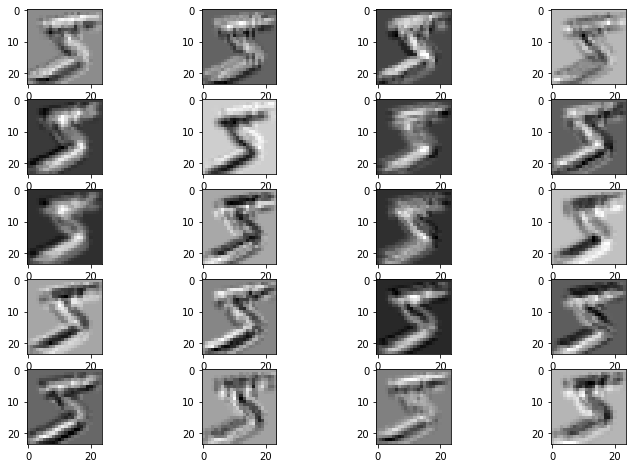

In [75]:
fig = plt.figure(figsize=[12,8])
for i in range(0,20):
    fig.add_subplot(5, 4, i+1)
    plt.imshow(output1[0,i,:,:],cmap='gray')
plt.show()

## 모든 filter 이미지를 더한 이미지(합성곱)

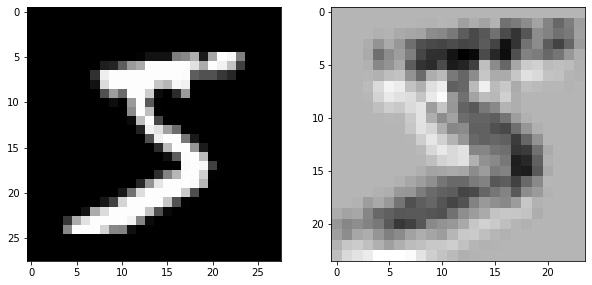

In [76]:
n = 0;
for i in range(20):
    n = output1[0,i,:,:]
plt.figure(figsize=[10,8])
plt.subplot(1,2,1)
plt.imshow(image.reshape([28,28]),'gray')
plt.subplot(1,2,2)
plt.imshow(n,'gray')
plt.show()

## 두번째 layer에서의 CNN을 적용한 숫자 output 이미지의 양상

In [77]:
layer2 = nn.Conv2d(20,64,3).to(torch.device('cpu'))

In [78]:
output_data2 = layer2(output_data1)
output_data2 = output_data2.data
output2 = output_data2.cpu().numpy()
print(output2.shape)

(1, 64, 22, 22)


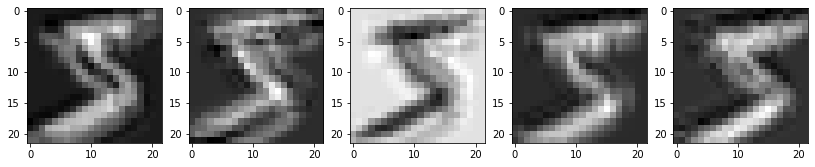

In [79]:
plt.figure(figsize=(14,10))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(output2[0,i],'gray')

# pooling
- MaxPoo Layer는 weight가 없기 때문에 바로 numpy()가 가능

In [80]:
pool = F.max_pool2d(image,2,2)
pool = pool.numpy()

(1, 1, 14, 14)


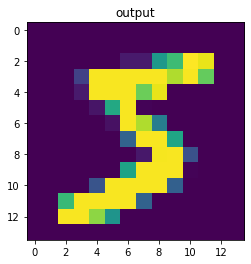

In [81]:
print(pool.shape)
plt.title('output')
plt.imshow(pool.reshape(pool.shape[2],pool.shape[3]))
plt.show()

## 세번째 layer에서의 MaxPooling을 적용한 숫자 output 이미지의 양상

In [82]:
layer3 = F.max_pool2d(output_data2,2,2)

In [83]:
print(layer3.shape)

torch.Size([1, 64, 11, 11])


In [84]:
output_data3 = layer3.data
output3 = output_data3.cpu().numpy()

### 각각 강조하는 부분이 다르다.
### 각각 강조하는 부분을 추출한다.

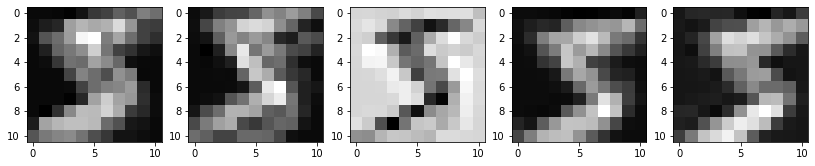

In [85]:
plt.figure(figsize=(14,10))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(output3[0,i],'gray')

# Linear
- nn.linear는 2d가 아닌 1d만 들어가기 때문에 .view() 1D로 펼쳐줘야함.

In [86]:
image.shape

torch.Size([1, 1, 28, 28])

In [87]:
flatten = image.view(-1,28*28)

In [88]:
print(flatten.shape)

torch.Size([1, 784])


In [89]:
lin = nn.Linear(784,10)(flatten)

In [90]:
lin.shape

torch.Size([1, 10])

tensor([[-0.0089, -0.0992,  0.1324, -0.1792, -0.2862, -0.1340, -0.1189, -0.0674,
          0.3360, -0.1461]], grad_fn=<AddmmBackward>)


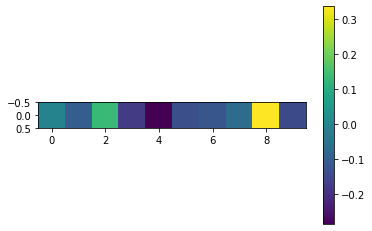

label: 8


In [91]:
print(lin)
lin_detach = lin.detach().numpy()
plt.imshow(lin_detach)
plt.colorbar()
plt.show()
print("label:",lin_detach.argmax())

## 네번째 layer에서의 Fully Connected을 적용한 숫자 output 이미지의 양상

In [92]:
layer3.shape

torch.Size([1, 64, 11, 11])

In [93]:
shape = layer3.detach().numpy().shape

In [94]:
print(shape)

(1, 64, 11, 11)


In [95]:
output_data4 = output_data3.view(-1,shape[1]*shape[2]*shape[3])
print(output_data4.shape)

torch.Size([1, 7744])


### dense network는 분해 되었된 이미지를 다시 재조립한 이미지
- output 만큼의 재조립된 이미지가 출력된다고 추상화 하면 된다.

In [96]:
layer4 = nn.Linear(7744,10000)

In [97]:
output_data5 = layer4(output_data4)

In [98]:
output_data5

tensor([[-0.1249, -0.0458, -0.1707,  ...,  0.0259,  0.0449, -0.0064]],
       grad_fn=<AddmmBackward>)

## Softmax
- 결과를 numpy로 꺼내기 위해선 weight가 담긴 Linear에 weight를 꺼줘야함

In [99]:
with torch.no_grad():
    flatten = image.view(-1,28*28)
    lin = nn.Linear(784,10)(flatten)
    print(lin)
    softmax = F.softmax(lin,dim=1)
    print(softmax)
    log_softmax = F.log_softmax(lin,dim=1)
    print(log_softmax)

tensor([[-0.0159,  0.1895,  0.0984, -0.0379,  0.1670, -0.1513,  0.0518, -0.0043,
          0.1203, -0.0351]])
tensor([[0.0942, 0.1157, 0.1057, 0.0922, 0.1132, 0.0823, 0.1009, 0.0953, 0.1080,
         0.0925]])
tensor([[-2.3618, -2.1564, -2.2475, -2.3838, -2.1789, -2.4972, -2.2941, -2.3502,
         -2.2256, -2.3810]])


In [100]:
softmax.argmax()

tensor(1)

In [101]:
np.log(0.0916)

-2.3903240073020524

In [102]:
np.sum(softmax.numpy())

1.0

In [103]:
log_softmax.numpy()

array([[-2.3618398, -2.156421 , -2.2474768, -2.383779 , -2.1788628,
        -2.4972112, -2.2940993, -2.3502405, -2.225558 , -2.381004 ]],
      dtype=float32)

## Layer 쌓기

예제 출처: https://pytorch.org/tutorials/beginner/pytorch_with_examples.html#id32

nn 과 nn.functional의 차이점
- nn은 학습 파라미터가 담긴 것
- nn.functional은 학습 파라미터가 없는 것이라 생각하면 간단

In [104]:
import torch.nn as nn

In [105]:
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.conv1 = nn.Conv2d(1,20,5,1)
        self.conv2 = nn.Conv2d(20,50,5,1)
        self.fc1 = nn.Linear(4*4*50,500)
        self.fc2 = nn.Linear(500,10)
    
    def forward(self, x):
        # Feature Extraction
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x,2,2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x,2,2)
        
        # Fully Connected(Classfication)
        '''
        shape = x.detach().numpy().shape
        size = shape[1]*shape[2]*shape[3]
        '''
        x = x.view(-1,4*4*50)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x,dim=1)
        

$${LogSoftmax(x_i) = log({exp(x_i)\over \sum_jexp(x_j)})}$$

### Softmax vs LogSoftmax
- LogSotfmax have numerical stability reasons than Softmax
- 0에 가까워 질수록 숫자가 더욱 작아진다.
- 0에서 멀어질수록 값의 크기 변화가 별로 변하지 않는다.

In [106]:
modele = Net()

In [107]:
modele.forward(image)

tensor([[-2.2684, -2.2444, -2.2964, -2.3378, -2.3195, -2.2743, -2.3077, -2.3203,
         -2.3606, -2.3017]], grad_fn=<LogSoftmaxBackward>)

In [108]:
import os
from glob import glob
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

## seed
난수 생성
**생각 외로 컴퓨터는 난수를 간단히 만들 수 없다.** 컴퓨터는 기본적으로 정해진 입력에 따라 정해진 값을 낼 뿐이다. 사람처럼 무의식적인 선택, 혹은 우연에 의한 선택을 할 수 없기 때문이다. 흔히 보는 랜덤은 정말로 임의의 값이 아니고 **특정한 방법으로 계산하거나 몇 밀리초(ms) 단위로 시시각각 변하는 값을 초기값으로 잡은 다음 여러 계산 과정을 거쳐 사람이 볼 때에는 마치 임의의 값인 것처럼 보이게 하는 것**이다. 전문용어로는 결정적 유한 오토마타(Deterministic Finite Automata), 의사난수(Pseudo Random)라고 한다.

흔히 **난수표를 쓰는데 난수표가 정해진 이상 결국 같은 순서로 같은 숫자가 나오게 된다.**
->
이를 해결하기 위한 방법은 난수표를 여러개 만들어 놓고 매번 다른 난수표를 읽도록 만드는 것
=> **시드(seed)**
**But 시드값이 똑같으면 선택되는 난수표도 똑같기 때문에 시드값도 난수여야 한다.**

‘난수를 만들려면 난수가 필요하다’는 문제가 발생하게 되는 것
-> 그래서 **보통은 시드값으로 현재 시간을 넣어서 해결한다.**

seed(숫자,ex)1) - 동일한 패턴의 난수표로 부터 랜덤값을 출력한다.<br>
seed(random) - 무작위한 난수표로 부터 랜덤값을 출력한다.

In [109]:
seed = 1
batch_size = 64
test_batch_size = 64

np_cuda = False

## model 훈련시키기

### Preprocess

In [110]:
torch.manual_seed(seed)
train_loader =  torch.utils.data.DataLoader(
    datasets.MNIST('dataset/',train=True,download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize(mean=(0.1307,),std=(0.3081,))
                   ])),
            batch_size=batch_size,shuffle=True)

test_loader =  torch.utils.data.DataLoader(
    datasets.MNIST('dataset/',train=False,download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize(mean=(0.1307,),std=(0.3081,))
                   ])),
            batch_size=batch_size,shuffle=True)

In [111]:
train_img, train_label = next(iter(train_loader))

In [112]:
print(train_img.shape)

torch.Size([64, 1, 28, 28])


### Model

In [113]:
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.conv1 = nn.Conv2d(1,20,(5,5))
        self.conv2 = nn.Conv2d(20,50,(5,5))
        self.fc1 = nn.Linear(4*4*50,500)
        self.fc2 = nn.Linear(500,10)
        
    def forward(self,x):
        layer1 = F.relu(self.conv1(x))
        layer2 = F.max_pool2d(layer1,2,2)
        layer3 = F.relu(self.conv2(layer2))
        layer4 = F.max_pool2d(layer3,2,2)
        layer5 = layer4.view(-1,4*4*50)
        layer6 = F.relu(self.fc1(layer5))
        layer7 = self.fc2(layer6)
        return F.log_softmax(layer7)
        

### Optimizer
- Model과 Optimization 설정

In [114]:
model = Net().cpu()

In [115]:
optimizer =optim.SGD(model.parameters(),lr=0.03,momentum=0.5)

In [116]:
params = list(model.parameters())
for i in range(len(params)):
    if i%2==0:
        print("weight:",params[i].shape)
        
    else:
        print("bias:",params[i].shape)


weight: torch.Size([20, 1, 5, 5])
bias: torch.Size([20])
weight: torch.Size([50, 20, 5, 5])
bias: torch.Size([50])
weight: torch.Size([500, 800])
bias: torch.Size([500])
weight: torch.Size([10, 500])
bias: torch.Size([10])


### Before Training
- 학습하기 전에 Model이 Train할 수 있도록 Train Mode로 변환
- Convolution 또는 Linear뿐만 아니라, DropOut과 추후에 배우게 될 Batch Normalalization과 같이 parameter를 가진 Layer들도 학습하기 위해 준비

In [117]:
model.train() # train mode

Net(
  (conv1): Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(20, 50, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=800, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=10, bias=True)
)

- 모델에 넣기 위한 첫 batch 데이터 추출

In [118]:
data, target = next(iter(train_loader))

In [119]:
data.shape, target.shape

(torch.Size([64, 1, 28, 28]), torch.Size([64]))

- 추출한 Batch 데이터를 cpu 또는 gpu와 같은 devise에 compile
    - 처음엔 cpu() or cuda()로 설정해주어야 함.-> 설정 안 하면 cpu로 설정
    - device('cpu'or'gpu'): tensor를 처리 할시 cpu로 할지 gpu로 할지 정하는 것.

In [120]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [121]:
data, target = data.to(device), target.to(device)

- optimizer를 잘 실행 시키기 위해서 gradient descent전에 gradients를 clear하면 새로운 최적화 값을 찾기 쉬어진다.
    - zero_grad는 전 스텝의 오래된 그라디언트들을 0으로 초기화하는 것이다. 만약 0으로 초기화 하지 않는다면 역전파를 할때마다 누적 될것이다.

In [122]:
optimizer.zero_grad()

- 준비한 데이터를 model에 input으로 넣어 output을 얻음

In [123]:
output = model(data)

/Users/changmin.kim/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


In [124]:
output.shape

torch.Size([64, 10])

- Model에서 예측한 결과를 Loss Function에 넣음
    - 여기 예제에서는 Negative Log-Likelihood Loss라는 Loss Function을 사용

In [125]:
loss = F.nll_loss(output,target)

In [126]:
print(loss)

tensor(2.3333, grad_fn=<NllLossBackward>)


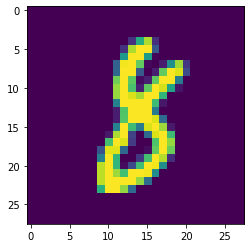

tensor(8)


In [127]:
i = 50
plt.imshow(data[i].reshape([28,28]))
plt.show()
print(output[i].argmax())

- Back Propagation을 통해 Gradients를 계산

In [128]:
loss.backward()

- 계산된 Gradients는 계산된 걸로 끝이 아니라 Parameter에 Update

In [129]:
optimizer.step()

- 각 weight의 gradient 구하기

In [130]:
weight_list = list(model.parameters())

for i in range(len(weight_list)):
    if(i%2==0):
        print('layer',int(i/2)+1)
    print(weight_list[i].shape)
    print(weight_list[i].grad)

layer 1
torch.Size([20, 1, 5, 5])
tensor([[[[ 1.1973e-02,  1.0084e-02,  4.6156e-03, -3.7322e-03, -6.1405e-03],
          [ 9.4407e-03,  8.1255e-03,  2.1910e-03, -4.4609e-03, -7.8846e-03],
          [ 9.2462e-03,  7.8641e-03, -1.1402e-03, -2.5533e-03, -2.7375e-03],
          [ 7.1556e-03,  1.1970e-03, -2.5037e-03, -2.9909e-03, -2.8276e-03],
          [ 3.5478e-03, -1.1557e-03, -4.6803e-03, -4.5454e-03, -5.3392e-03]]],


        [[[-1.9089e-03, -1.9508e-03, -2.0906e-03, -2.9517e-03, -1.4721e-03],
          [-1.9259e-03, -3.1591e-03, -2.5811e-03, -2.2518e-04,  2.0818e-03],
          [ 2.5619e-03,  2.2889e-04,  2.1449e-04,  2.3713e-03,  3.4122e-03],
          [ 3.6785e-03,  2.5786e-03,  2.6987e-03,  1.4811e-03,  5.5472e-04],
          [ 1.7471e-03,  3.8831e-03,  3.7538e-03,  3.5565e-03,  4.0316e-03]]],


        [[[-3.7518e-03, -1.1656e-03,  1.4788e-03,  8.8606e-04, -1.3256e-03],
          [-1.4375e-03,  2.6135e-03,  3.7374e-03,  2.8405e-04, -1.4110e-03],
          [ 2.7126e-03,  4.3352e-0

## Start Training

In [131]:
epochs = 1
log_interval = 100

In [132]:
for epoch in range(1,epochs+1):
    # Train Mode
    model.train()
    for batch_idx, (data,target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        model.zero_grad()
        output = model(data)
        loss = F.nll_loss(output,target)
        loss.backward()
        optimizer.step()
        if batch_idx % log_interval ==0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100 * batch_idx / len(train_loader), loss.item()
            ))

/Users/changmin.kim/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Train Epoch: 1 [0/60000 (0%)]	Loss: 2.243374
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.519768
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.191487
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.137811
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.069902
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.182901
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.061660
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.052952
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.106845
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.052099


## Evalutaion
- 앞에서 model.train()모드로 변한 것처럼 평가 할 때는 model.eval()로 설정.
    - Batach Normalization 이나 Drop Out 같은 Layer들을 잠금

In [133]:
model.eval()

Net(
  (conv1): Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(20, 50, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=800, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=10, bias=True)
)

- autograd engine, 즉 backpropagation이나 gradient 계산등을 꺼서 memory usage를 줄이고 속도를 높인다.

In [287]:
test_loss = 0
correct = 0

epoch = 2
for i in range(epoch):
    with torch.no_grad():
        data, target = next(iter(test_loader))
        data, target = data.to(device), target.to(device)
        output = model(data)
        test_loss += F.nll_loss(output, target,reduction='mean').item()

        pred = output.argmax(dim=1, keepdim=True)# 0차원은 바뀌지 않게 한다.
        correct += (pred.eq(target.view_as(pred)).sum().item())/64
        print("correct",correct)
print(test_loss)
print(test_loss/epoch)
print("정확도",correct*100/epoch)


correct 0.9375
correct 1.921875
0.28191421180963516
0.14095710590481758
정확도 96.09375


/Users/changmin.kim/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


## 가정
모델을 만드는 이유는 현실을 좀 더 단순한 형태로 표현하기 위해서 불필요하다고 생각하는 정보들을 버려야 한다. 필요한 정보만 추출하는 것이 가정이다.

## 선형 회귀분석의 4가지 기본가정

- (1) 선형성
- (2) 독립성
- (3) 등분산성
- (4) 정규성

## 선형/비선형 함수

### 선형 함수
- 선형이라는 것은 직선이 아닐 지라도 직선의 특징을 가지고 있다는 것을 의미한다.
- 중첩의원리 또는 선형성의 원리를 가짐.
- **중첩의 원리**
    - T(cu) = cT(u)
    - T(u+v) = T(u) + T(v)
- 예측이 가능하다.
$${ex)y=3x}$$

![](https://t1.daumcdn.net/cfile/tistory/2761F3505550195A2D)

### 비선형 함수 
- 예측이 어려워진다.
- 변수가 많아져 복잡해진다.
$${ex)y = x^2 }$$
![](https://t1.daumcdn.net/cfile/tistory/2602794755501D042D)

## 활성화 함수
- 선형 함수가 아닌 비선형 함수를 사용해야된다.
- ex) 선형함수로 할시 예측가능 하다.
$${f(x) = cx, h = f(f(x1)+f(x2))}$$
$${h = f^2(x1+x2)}$$
- 비선형함수로 할시 여러 장점들이 생긴다.
    - 예측 가능하지 않아서 layer가 복잡해지고 깊어진다.
        - 복잡해지면 변수가 많아져 계산량이 많아진다.
- 여러 활성화 비선형 함수는 필요없는 노드를 제거하기 위한용도 


**Fullly-Connected Layer(Dense Layer)**
- 모든 뉴런이 서로 연결된 계층.

## Shallow Neural NetWork(얕은 신경망)
- 입력, 은닉, 출력의 3가지 계층으로 되어 있으며, 은닉 계층과 출력 계층이 Fully Connected 계층인 모델.

![](https://heung-bae-lee.github.io/image/regression.png)
- 회귀의 경우 전 범위의 연속된 값을 출력하므로, 보통 identity function(항등 함수)을 사용한다. 

$${ y = identityF(wx^i) + bias(noise)}$$

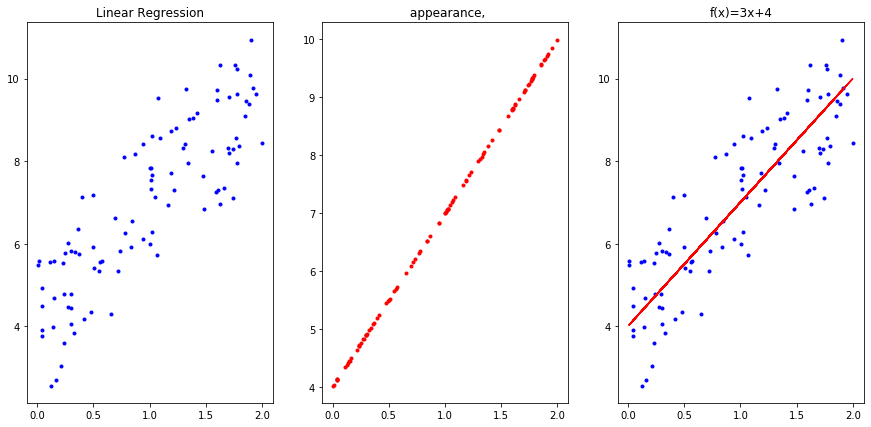

In [137]:
identity = 3
X = 2*np.random.rand(100,1)
Y = 4 + identity*X + np.random.randn(100,1)
Y_copy = Y
plt.figure(figsize=(15,7))
plt.subplot(1,3,1)
plt.title('Linear Regression')
plt.plot(X,Y,'b.')

Y = 4 + identity*X 
plt.subplot(1,3,2)
plt.title(' appearance,')
plt.plot(X,Y,'r.')


plt.subplot(1,3,3)
plt.title('f(x)=3x+4')
Y = Y_copy
plt.plot(X,Y,'b.')
Y = 4 + identity*X 
plt.plot(X,Y,'r')
plt.show()

![](https://heung-bae-lee.github.io/image/classification.png)

In [138]:
a = 13
b = 3
c = 9

In [139]:
a_num = np.exp(a)/(np.exp(a)+np.exp(b)+np.exp(c))

In [140]:
b_num = np.exp(b)/(np.exp(a)+np.exp(b)+np.exp(c))

In [141]:
c_num = np.exp(c)/(np.exp(a)+np.exp(b)+np.exp(c))

In [142]:
a_num + b_num + c_num

1.0

In [143]:
a_select = [1,0,0]
b_select = [0,1,0]
c_select = [0,0,1]

In [144]:
(np.array(a_select) * np.array([a_num,b_num,c_num])).sum()

0.9819700105182744

In [145]:
(np.array(b_select) * np.array([a_num,b_num,c_num])).sum()

4.458136950639617e-05

In [146]:
(np.array(c_select) * np.array([a_num,b_num,c_num])).sum()

0.017985408112219218

![](https://heung-bae-lee.github.io/image/shallowNN_and_regression_algorithm.png)


### 다중 회귀 -> 회귀 곡선
![](https://lh3.googleusercontent.com/proxy/dsBvt6Wi6F5M7nICwDZpEWyXFcUJ1TtqIdQcQWnbTFPZiTiGavkIPAQLgK4W31h0dHb2_DxANHRsZAre3SCqUKwIZe7L-W6sNGtTvCONtd76TNoRYBEvkc5QfLYtvlj5aeBO-NcGbtPue0n2Oeoeu6idqYyCZZLlJ__ISzyqsduruBLLxFwHDMQwANWc24SDnAZacGjL2LpQaAAH9MbuKEtjdWTeg_lgE4-FTUCx5ztCHym9Wu7bcvjdZIdVj72435Ov9Dy8NdJaOrjZyLd6dYBkMvvEZGLEwfs)
- 위 그래프와 같은 데이터 분포는 위로 볼록한 2차원 곡선 형태로 되어 있다.
$${y=w_0 + w_1x + w_2x^2}$$
- 동일한 개념으로 일반적인 곡선에 대해 회귀 모델을 가정하면 아래와 같은 수식으로 표현.
$${y=w_0 + w_1x + w_2x^2+...+w_dx^d}$$
- **다항 회귀는 다중 회귀식의 일종이므로 설명변수가 여러개 있는 식으로 나태낸다.**
    - 설명변수: 회귀분석에서 독립변수(함수 관계에서, 다른 변수의 변화와는 관계없이 독립적으로 변화하고 이에 따라 다른 변수)
$${X_d = x^d}$$
$${y=w_0 + w_1X_1 + w_2X_2+...+w_dX_d}$$


- hidden layer층은 선형이 아니라 비선형으로 처리 되기 때문에 이러한 이미지가 형성된다.
![](https://heung-bae-lee.github.io/image/hidden_Layer_and_regression.png)

**Sigmoid 함수**
$${sigmoid(x) = {1\over{1+e^{-x}}}}$$

In [147]:
def sigmoid(x):
    n = 1/(1+np.exp(-x))
    return n

In [148]:
print(sigmoid(-100))

3.7200759760208356e-44


**Softmax 함수**
$${softmax(x)_i = {e^{x_i}\over{\sum_j e^{x_j}}}}$$

In [149]:
def softmax(ndarray):
    '''
    ndarray만 됨
    return ndarray
    '''
    num = len(ndarray)
    output_num = []
    for i in range(num):
        output_num.append(np.exp(ndarray[i])/(np.exp(ndarray).sum()))
    return output_num

In [150]:
ndarray = np.array([1,2,3,4])

In [151]:
softmax(ndarray)

[0.03205860328008499,
 0.08714431874203257,
 0.23688281808991013,
 0.6439142598879722]

In [152]:
data = np.load('ch2_dataset.npz')

In [153]:
inputs = data['inputs']
labels = data['labels']

In [154]:
class ShallowNN:
    def __init__(self,num_input,num_hidden,num_output):
        self.W_h = np.zeros((num_hidden,num_input),dtype=np.float32)
        self.b_h = np.zeros((num_hidden),dtype=np.float32)
        self.W_o = np.zeros((num_output,num_hidden),dtype=np.float32)
        self.b_o = np.zeros((num_output),dtype=np.float32)
        
    def __call__(self,x):
        h = sigmoid(np.matmul(self.W_h,x)+self.b_h)
        o = softmax(np.matmul(self.W_o,h)+self.b_o)
        return o

In [155]:
shallow_model = ShallowNN(2,128,10)

In [156]:
weight = np.load('ch2_parameters.npz')
shallow_model.W_h = weight['W_h']
shallow_model.b_h = weight['b_h']
shallow_model.W_o = weight['W_o']
shallow_model.b_o = weight['b_o']

In [157]:
outputs = []
for pt, label in zip(inputs,labels):
    shallow_ouput = shallow_model(pt)
    outputs.append(np.argmax(shallow_ouput))
    print((np.argmax(shallow_ouput),label))
print(outputs)
outputs = np.stack(outputs, axis = 0)

(0, 0)
(0, 0)
(2, 0)
(0, 0)
(1, 0)
(0, 0)
(0, 0)
(0, 0)
(1, 0)
(0, 0)
(0, 0)
(0, 0)
(2, 0)
(3, 0)
(0, 0)
(0, 0)
(2, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(2, 0)
(0, 0)
(2, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(1, 0)
(6, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(6, 0)
(0, 0)
(0, 0)
(0, 0)
(3, 0)
(0, 0)
(0, 0)
(0, 0)
(3, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(6, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(9, 0)
(0, 0)
(2, 0)
(6, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(3, 0)
(0, 0)
(0, 0)
(2, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(1, 0)
(1, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(9, 0)
(0, 0)
(0, 0)
(1, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(0, 0)
(1, 1)
(5, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(5, 1)
(1, 1)
(1, 1)
(2, 1)
(1, 1)
(0, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(5, 1)
(1, 1)
(1, 1)
(1, 1)
(0, 1)

In [158]:
inputs[:,0].shape

(1000,)

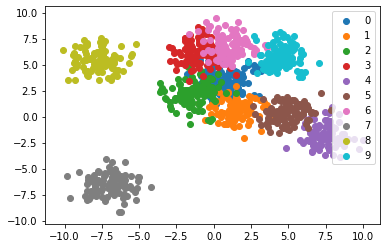

In [159]:
name = []
for idx in range(10):
    mask = labels == idx
    plt.scatter(inputs[mask,0],inputs[mask,1])
    name.append(str(idx))

plt.legend('0123456789')
plt.show()

In [160]:
x = np.arange(-50,50)

In [161]:
y = 1/(1+np.exp(-x))

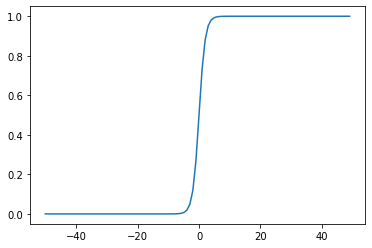

In [162]:
plt.plot(x,y)

In [163]:
1/(1+np.exp(-(30)))

0.9999999999999065

In [164]:
(0.6*0.3 + 0.53*0.9)

0.657

In [165]:
0.3*0.5712 + 0.6*0.0918

0.22644000000000003

## 비용함수
- 손실함수 라고도 함

## 비용함수의 종류
### MSE
- Mean Squared Error(평균 제곱 오차)
$${MSE(w)={1\over m}\sum^m_{i=1} (identityF(w^T*\mathbf x^{(i)})-y^{(i))^2})}$$

### MAE
- Mean Absolute Error(평균 절댓 오차)
$${MAE(w)={1\over m}\sum^m_{i=1} |(identityF(w^T*\mathbf x^{(i)})-y^{(i))}|}$$

### NLL_Loss
- Negative Log Likelihood Loss(NLL의 비용함수)
$${nllLoss(h,y)= y *-log(h)}$$
- NLL(Negative Log Likelihood)
$${L(y)= -log(y)}$$

- cross_entroyp는 softmax와 nll_loss를 가지고 있다.



#### MSE 와 MAE의 차이
MAE는 오차의 절댓값을 사용해서 모델 예측정도를 측정하기 때문에 outlier(이상값)에 대해서 MSE 보다 덜 민감하게 반응한다. 
예를 들어서, 전반적으로 모델의 오차가 작은 값을 갖고 있음에도 불구하고 예측에 실패한 큰 오차값을 같은 항이 존재하는 경우 MSE는 제곱연산에 의해서 오차 정도를 과대평가할 가능성이 있다.
but MSE가 MAE보다 계산이 보다 더 쉽다.

### Cross-Entropy
- 분류가 2개일 경우
$${J(w)=-{1\over m}\sum^m_{i=1} [y^{(i)}log(\sigma(w^T*\mathbf x))+(1-y^{(i)})log(1-\sigma(w^T*\mathbf x))]}$$
- 분류가 3개 이상일 경우
$${J(w)=-{1\over m}\sum^m_{i=1} \sum^K_{k=1} y_k^{(i)}log(softmaxF(w^T*\mathbf x))}$$
<br>
$${softmaxF(\mathbf x)={exp(s_k(\mathbf x)\over \sum ^k_{j=1}exp(s_j(\mathbf x))}}$$

### SSE: Sum squared error

### Evaluation of regression model
- 주로 MSE나 MAE 비용함수를 사용한다.


### Evaluation of classification model
- 주로 Cross-Entropy를 사용한다.

### 비용함수의 미분
기본 형태(**단 if gradient > 0일때 성립, gradient==0이면 갱신이 안된다(vanishing)**)

$${{1\over m}\sum^m_{i=1} error*x_j^{(i)}}$$
$${error=(activationF(w^T*\mathbf x) - y^{(i)})}$$
의미: **(입력값[scalar] in error)의 영향력** = **weight**

#### MSE 비용함수의 미분
$${{∂\over ∂w_j}MSE(w)={2\over m}\sum^m_{i=1}(identitiF(w^T* \mathbf x^{(i)})-y^{(i)})x_j^ {(i)}}$$

#### Cross-Entropy 미분(분류 2개인 경우)
$${{∂\over ∂w_j}J(w)={1\over m}\sum^m_{i=1} (\sigma(w^T*\mathbf x)-y^{(i)})x_j^{(i)}}$$

#### Cross-Entropy 미분(분류 3개 이상인 경우)
$${{∂\over ∂w_j}J(w)={1\over m}\sum^m_{i=1}(softmaxF(w^T*\mathbf x)_k^{(i)}-y_k^{(i)})\mathbf x^{(i)}}$$


## 경사 하강 스탭
$${\theta:=\theta-\eta*{∂\over ∂\theta}cost(\theta)}$$
![](https://img1.daumcdn.net/thumb/R720x0.q80/?scode=mtistory2&fname=http%3A%2F%2Fcfile5.uf.tistory.com%2Fimage%2F99D8634C5D89919B21726C)

![](https://heung-bae-lee.github.io/image/deep_learning_and_optimization_theory.png)

![](http://i.imgur.com/NKsFHJb.gif?1)

In [ ]:
new_model.eval()
new_model(torch.from_numpy(torch_image))

### 배치
- 모든 데이터를 사용하지 않고 일부만 사용해서 학습시키는 것.
- SGB
- 미니배치(mini_batch)

### Internal Covariage Shift
- 학습과정에서 계층별로 입력의 데이터 분포가 달라지는 현상
![](https://gaussian37.github.io/assets/img/dl/concept/batchnorm/3.png)

## 배치 정규화
- 학습과정에서 각 배치별로 평균과 분산을 이용해 정규화하는 계층
- 수식
$${BN(X) = {\epsilon({{X-\mu_{batch}}\over{\sigma_{batch}}}})+\beta }$$
$${\epsilon = scaling}$$
$${\beta = bias}$$
- 정규화로 인해, 모든 계층의 Feature가 동일한 Scale이 되어 학습률 결정에 유리.
- 추가적인 Scale,Bias를 학습하여 Activation에 적합한 분포로 변환할 수 있음.
![](https://gaussian37.github.io/assets/img/dl/concept/batchnorm/4.png)
### 배치 정규화 알고리즘
#### 훈련 단계
1.batch_mean$${µ_{B}={1\over{m_B}}\sum_{i=1}^{M_B}x^{(i)} }$$
2.batch_std$${\sigma_b^{2}={1\over{m_B}}\sum_{i=1}^{M_B}(x^{(i)}-µ_B)^{2} }$$
3.standardization$${\chi^{(i)}={{x^{(i)}-µ_B}\over{\sigma}}}$$
4.BatchNorm $${BN(x) = r\chi^{(i)}+\beta}$$
$${r: 층의 스케일 파라미터}$$
$${\beta: 층의 이동(편향) 파리미터}$$
$${\beta와 r은 역전파에 의해 학습, relu에 의한 뉴런 소실을 방지하는 목적으로 사용}$$
5. 추가적인 **Scale,Bias를 학습**하여 **Activation에 적합한 분포로 변환**할 수 있음.

#### 추론 단계
standardization$${\chi^{(i)}={{x^{(i)}-µ_{BN}}\over{\sigma_{BN}}}}$$
BatchNorm $${BN(x) = r\chi^{(i)}+\beta}$$
$${r,\beta는 훈련시에 역전파로 학습된 r,\beta }$$
학습과정에서 최근 n개에 대한 이동 평균(또는 지수평균)을 계산
$${µ_{BN} = {{1\over{N}}\sum_i\beta^i_{batch}}}$$
$${\sigma_{BN} = {{1\over{N}}\sum_i\sigma^i_{batch}}}$$
